In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [3]:
# preparing the data 

prep_ = pd.read_csv("data.csv")
prep_

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
prep_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
prep_.shape

(150150, 9)

In [6]:
prep_.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [7]:
# checking for the missing values 
prep_.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [8]:
""" since we have only one missing value in the total_price we can replce witht the tendency"""
prep_["total_price"].isnull().sum()
prep_["total_price"].describe()

count    150149.000000
mean        206.626751
std         103.308516
min          41.325000
25%         130.387500
50%         198.075000
75%         233.700000
max         562.162500
Name: total_price, dtype: float64

In [9]:
"""but since we havew only one row then we can delete (since our dataset is very huge )"""

prep_.dropna(subset=["total_price"],inplace=True)

In [10]:
prep_.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [11]:
# now checking for the duplicates 
prep_.duplicated().sum()

0

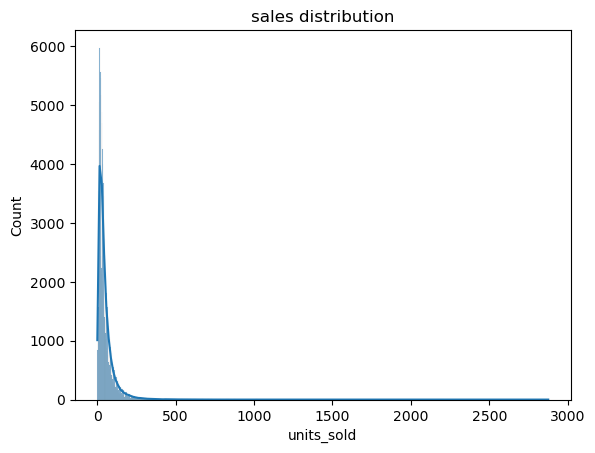

<Figure size 640x480 with 0 Axes>

In [12]:
## performing the univariate for the units_sold feature 
"""to find the sales distribution"""

sns.histplot(prep_["units_sold"],kde=True)
plt.title("sales distribution")
plt.show()
plt.tight_layout()

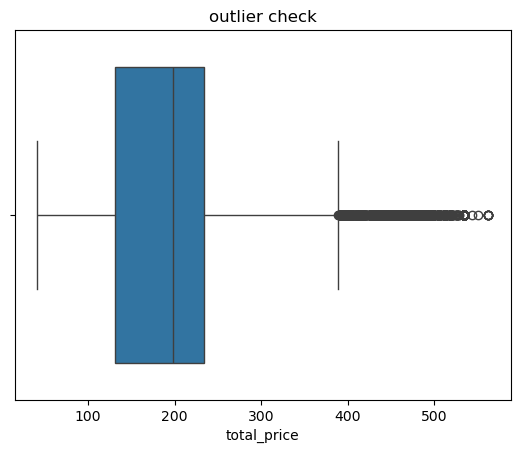

In [13]:
sns.boxplot(x=prep_["total_price"])
plt.title("outlier check")
plt.show()

store_id
8094    3120
8991    2990
9823    2990
8023    2730
8438    2730
        ... 
8091    1170
9439    1170
9178     780
9700     650
9001     260
Name: count, Length: 76, dtype: int64


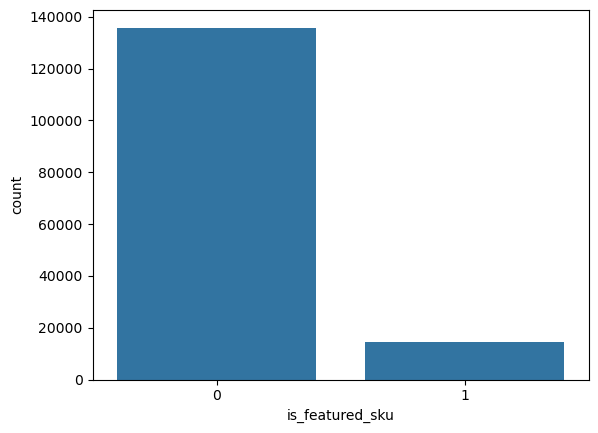

In [14]:

print(prep_["store_id"].value_counts())
sns.countplot(x="is_featured_sku",data=prep_)
plt.show()

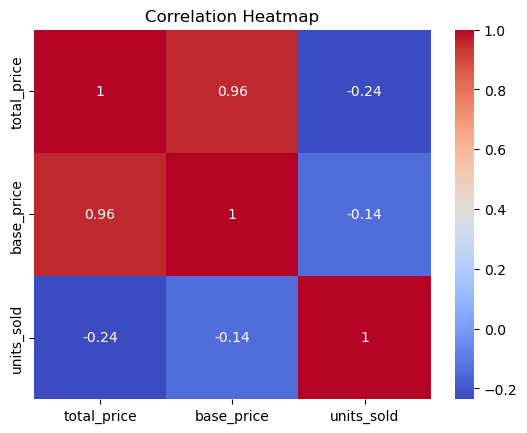

In [15]:
## bivariate analysiss

sns.heatmap(prep_[["total_price","base_price","units_sold"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

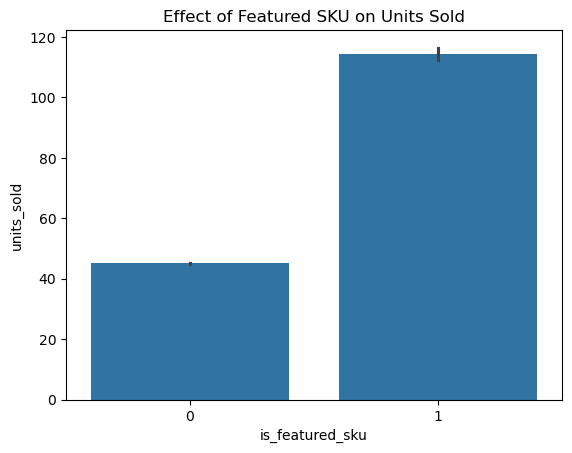

In [16]:
# feature on sales

sns.barplot(x="is_featured_sku", y="units_sold", data=prep_)
plt.title("Effect of Featured SKU on Units Sold")
plt.show()


In [17]:
# average sales per store 

sales_per_store = prep_.groupby("store_id")["units_sold"].mean().sort_values()
print(sales_per_store.head())

store_id
9700    20.236923
8392    21.655944
9001    23.280769
8555    26.743077
8319    28.010000
Name: units_sold, dtype: float64


In [18]:
## outlier detection 

Q1 = prep_["units_sold"].quantile(0.25)
Q3 = prep_["units_sold"].quantile(0.75)
IQR = Q3 - Q1
outliers = prep_[(prep_["units_sold"] < Q1 - 1.5*IQR) | (prep_["units_sold"] > Q3 + 1.5*IQR)]
print("Outliers in Units Sold:")
print(outliers.head())

Outliers in Units Sold:
    record_ID      week  store_id  sku_id  total_price  base_price  \
14         24  17/01/11      8095  217390      139.650     139.650   
18         30  17/01/11      8095  222087      173.850     192.375   
28         43  17/01/11      8094  216419       88.350      88.350   
70         93  17/01/11      8023  216418       98.325      88.350   
71         94  17/01/11      8023  216419       98.325      88.350   

    is_featured_sku  is_display_sku  units_sold  
14                0               0         186  
18                1               0         214  
28                0               1         133  
70                0               1         233  
71                0               1         256  


In [19]:
## feature engineering 
prep_["discount_pct"] = ((prep_["base_price"] - prep_["total_price"]) / prep_["base_price"]) * 100
prep_["discount_pct"]

0         11.464968
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
150145     0.000000
150146     0.000000
150147    26.067747
150148    26.022305
150149     0.000000
Name: discount_pct, Length: 150149, dtype: float64

In [20]:
# Revenue per unit
prep_["revenue_per_unit"] = prep_["total_price"] / prep_["units_sold"]
prep_["revenue_per_unit"]

0          4.951875
1          3.537054
2          7.050000
3          3.044318
4          2.712981
            ...    
150145     6.206250
150146     7.861250
150147    11.537903
150148    11.815625
150149    15.627500
Name: revenue_per_unit, Length: 150149, dtype: float64

In [21]:

# Week as datetime 
prep_["week"] = pd.to_datetime(prep_["week"], errors="coerce")
prep_['week']

C:\Users\rkimm\AppData\Local\Temp\ipykernel_20008\739337531.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prep_["week"] = pd.to_datetime(prep_["week"], errors="coerce")


0        2011-01-17
1        2011-01-17
2        2011-01-17
3        2011-01-17
4        2011-01-17
            ...    
150145   2013-09-07
150146   2013-09-07
150147   2013-09-07
150148   2013-09-07
150149   2013-09-07
Name: week, Length: 150149, dtype: datetime64[ns]

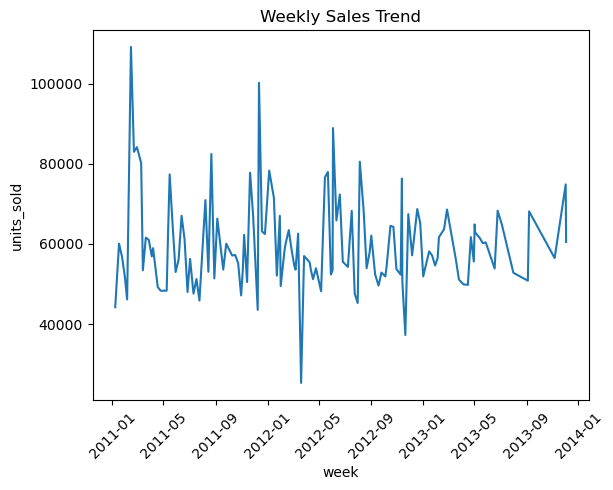

<Figure size 640x480 with 0 Axes>

In [22]:
weekly_sales = prep_.groupby("week")["units_sold"].sum().reset_index()
sns.lineplot(x="week", y="units_sold", data=weekly_sales)
plt.title("Weekly Sales Trend")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

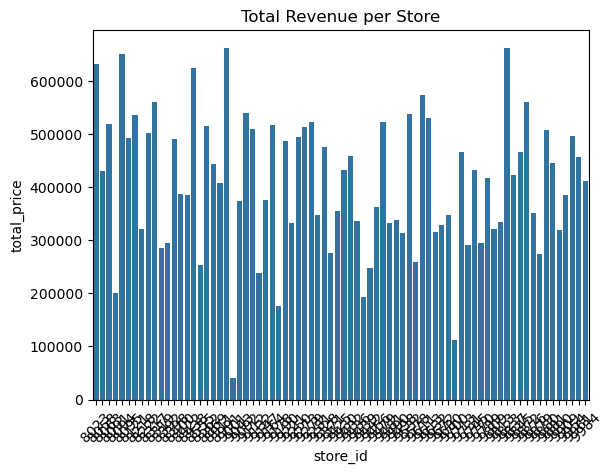

<Figure size 640x480 with 0 Axes>

In [23]:
# store wise revenue 

store_revenue = prep_.groupby("store_id")["total_price"].sum().reset_index()
sns.barplot(x="store_id", y="total_price", data=store_revenue)
plt.title("Total Revenue per Store")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

In [24]:
""" forcasting the unit sales for the upcoming weeks"""

' forcasting the unit sales for the upcoming weeks'

In [25]:
# importing libraries 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [26]:
prep_.columns

Index(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'units_sold', 'discount_pct',
       'revenue_per_unit'],
      dtype='object')

In [27]:
features = ['store_id', 'sku_id', 'total_price', 'base_price',
       'is_featured_sku', 'is_display_sku', 'discount_pct',
       'revenue_per_unit']

In [28]:
x = prep_[features]
y = prep_['units_sold']

In [29]:

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=42)


In [30]:
random_f = RandomForestRegressor(n_estimators=100,random_state=42)
random_f

RandomForestRegressor(random_state=42)

In [31]:
random_f.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [32]:
# predicting the results
y_predictt = random_f.predict(x_test)
y_predictt

array([ 41.  ,  13.  , 341.16, ...,  31.06,  21.  ,  36.  ])

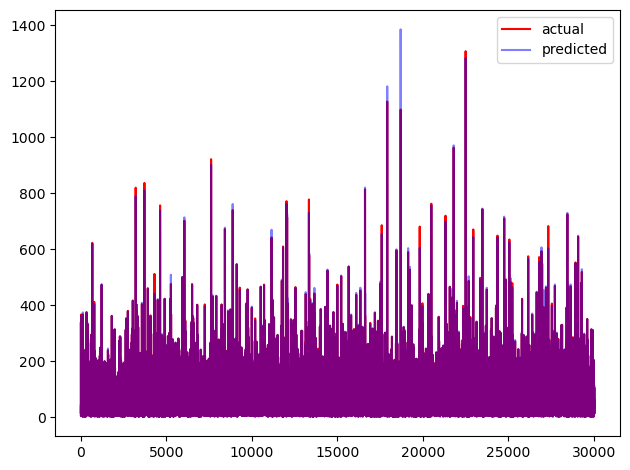

In [33]:
# actual X pedicted 

plt.plot(y_test.values,color="red",label="actual")
plt.plot(y_predictt,color="blue",alpha=0.5,label="predicted")
plt.legend()
plt.tight_layout()

In [34]:
# evaluating the model

print(mean_squared_error(y_test,y_predictt))
print(mean_absolute_error(y_test,y_predictt))
print(r2_score(y_test,y_predictt))

4.633702054612055
0.15722444222444232
0.9985840266560055


In [35]:
## feature importancee

importance = random_f.feature_importances_
f_importancess = pd.Series(importance,index=features).sort_values(ascending=False)
f_importancess

revenue_per_unit    0.883881
total_price         0.087924
base_price          0.026163
discount_pct        0.001167
sku_id              0.000525
store_id            0.000165
is_featured_sku     0.000106
is_display_sku      0.000070
dtype: float64

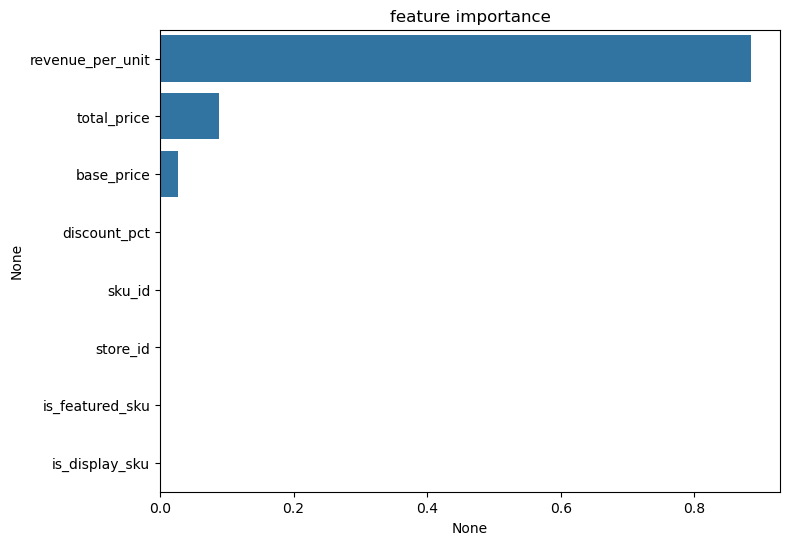

In [36]:
# barplot 

plt.figure(figsize=(8,6))
sns.barplot(x=f_importancess,y=f_importancess.index)
plt.title("feature importance")
plt.show()

In [37]:
# implementing xgboost algorithm

import xgboost
from xgboost import XGBRegressor

In [38]:
xgb_ = XGBRegressor(n_estimators = 300,larning_rate=0.1,random_state=42)

In [39]:
xgb_.fit(x_train,y_train)

C:\Users\rkimm\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:35:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "larning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             larning_rate=0.1, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None, ...)

In [40]:
y_predict_ = xgb_.predict(x_test)
y_predict_

array([ 40.87285 ,  12.962022, 323.40393 , ...,  30.445032,  21.05468 ,
        35.48277 ], dtype=float32)

In [41]:
# evaluting the xgboost model 

print(mean_squared_error(y_test,y_predict_))
print(mean_absolute_error(y_test,y_predict_))
print(r2_score(y_test,y_predict_))

130.5390530082466
1.1321306381986176
0.9601097106933594


In [42]:
## applying the deep learning model

# LSTM

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Scale the features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape for LSTM [samples, timesteps, features]
# Here we treat each sample as 1 timestep (since data not sequentially structured like time series)
X_train_lstm = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
X_test_lstm = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))  # regression output
lstm_model.compile(optimizer='adam', loss='mse')

# Train
history = lstm_model.fit(X_train_lstm, y_train, 
                         epochs=30, batch_size=32,
                         validation_split=0.2, verbose=1)

# Predict
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("LSTM MSE:", mean_squared_error(y_test, y_pred_lstm))
print("LSTM MAE:", mean_absolute_error(y_test, y_pred_lstm))
print("LSTM R2:", r2_score(y_test, y_pred_lstm))


C:\Users\rkimm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 3277.3079 - val_loss: 2928.8711
Epoch 2/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2566.6863 - val_loss: 2732.1318
Epoch 3/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2409.8245 - val_loss: 2596.1755
Epoch 4/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2287.0747 - val_loss: 2478.1909
Epoch 5/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2192.3645 - val_loss: 2381.2751
Epoch 6/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2119.0977 - val_loss: 2301.3174
Epoch 7/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2053.6929 - val_loss: 2230.9980
Epoch 8/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1980.5608 - val_loss: 2167.4949
Epoch 9/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1917.1239 - val_loss: 2102.1736
Epoch 10/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1863.6013 - val_loss: 2048.9480
Epoch 11/30
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - 

In [46]:
import numpy as np

def create_sequences(data, target, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])      
        y.append(target.iloc[i+time_steps])   # use .iloc for positional indexing
    return np.array(X), np.array(y)


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Scale all features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(x)   # assuming X is your feature matrix

# Create sequences using target variable
time_steps = 10
X_seq, y_seq = create_sequences(scaled_features, y, time_steps)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

print(X_train.shape, y_train.shape)


(120111, 10, 8) (120111,)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))  # regression output

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1)


C:\Users\rkimm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - loss: 4154.0547 - val_loss: 3247.0913
Epoch 2/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 3975.0615 - val_loss: 3251.1277
Epoch 3/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 3975.5608 - val_loss: 3250.8340
Epoch 4/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 3974.0728 - val_loss: 3244.9819
Epoch 5/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 3975.9302 - val_loss: 3251.3577
Epoch 6/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - loss: 3977.6965 - val_loss: 3249.8223
Epoch 7/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 3974.8081 - val_loss: 3247.8186
Epoch 8/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - loss: 3921.5229 - val_loss: 3180.0369
Epoch 9/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 3801.2808 - val_loss: 3160.0620
Epoch 10/50
3003/3003 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 3700.1216 - val_loss: 3062.5071
Epoch 11/50
3003/3003 ━━━━━━━━━━━━━━━━━━━

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("LSTM MSE:", mean_squared_error(y_test, y_pred))
print("LSTM MAE:", mean_absolute_error(y_test, y_pred))
print("LSTM R2:", r2_score(y_test, y_pred))


939/939 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
LSTM MSE: 2124.7330228318187
LSTM MAE: 26.107436412546658
LSTM R2: 0.25825726985931396
